In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
nf = pd.read_csv(r"C:\Users\Uday show\Downloads\netflix_titles.csv.zip")

In [4]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
print(nf.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [7]:
nf = nf.dropna(subset=['date_added','rating','duration'])

In [9]:
nf['cast'] = nf['cast'].fillna('unknown')

In [10]:
nf['director']= nf['director'].fillna('unknown')

In [11]:
nf['country']= nf['country'].fillna('unknown')

In [12]:
print(nf.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [13]:
sns.set(style='whitegrid')


C:\Users\Uday show\AppData\Local\Temp\ipykernel_16660\1929160006.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=nf, x='type', palette='Set2')


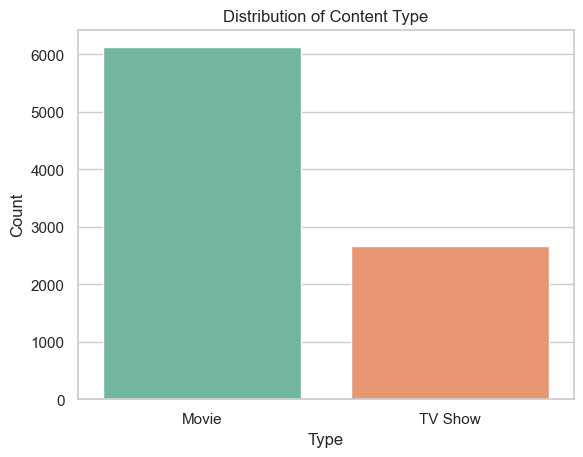

In [15]:
sns.countplot(data=nf, x='type', palette='Set2')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

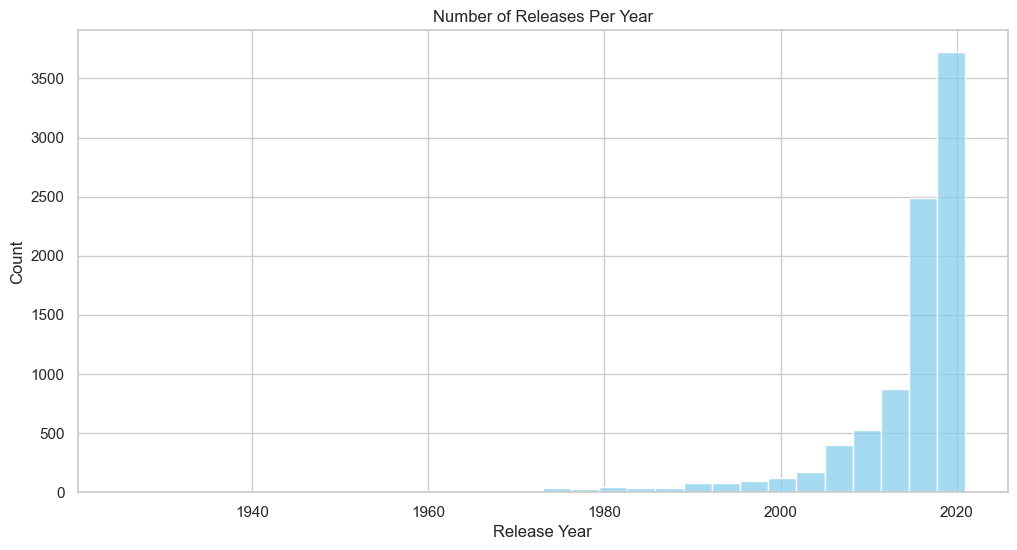

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(data=nf, x='release_year', bins=30, kde=False, color='skyblue')
plt.title('Number of Releases Per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


C:\Users\Uday show\AppData\Local\Temp\ipykernel_16660\2230011848.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


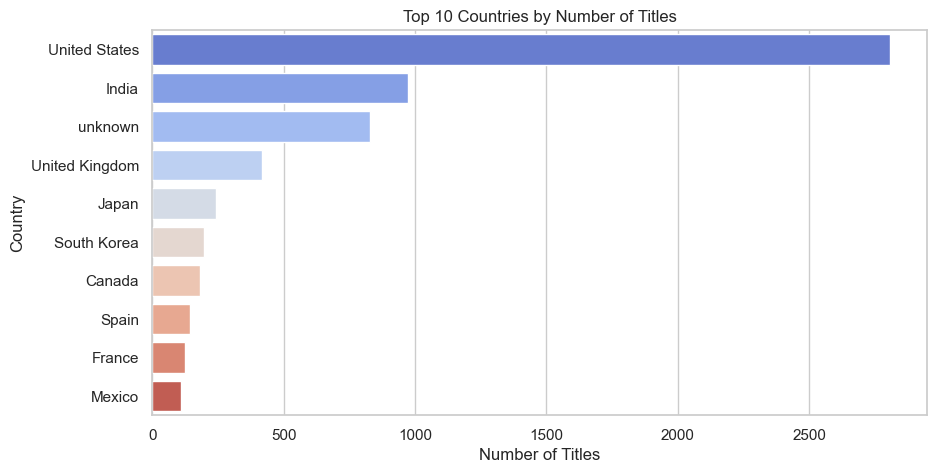

In [19]:
top_countries = nf['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


C:\Users\Uday show\AppData\Local\Temp\ipykernel_16660\3198631330.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_nf, y='Genre', x='Count', palette='viridis')


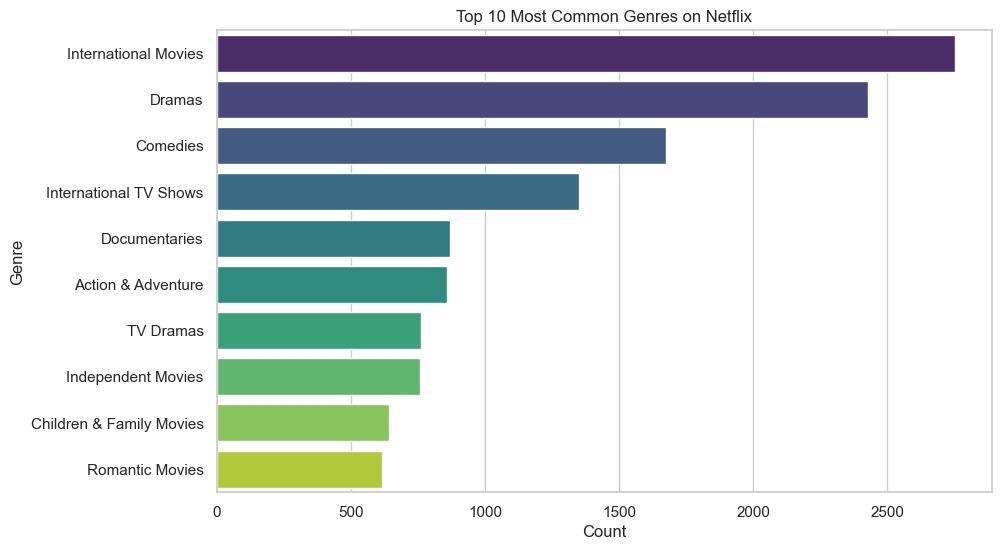

In [21]:
from collections import Counter


genre_series = nf['listed_in'].dropna().apply(lambda x: x.split(', '))
genre_counts = Counter([genre for sublist in genre_series for genre in sublist])


genre_nf = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(data=genre_nf, y='Genre', x='Count', palette='viridis')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


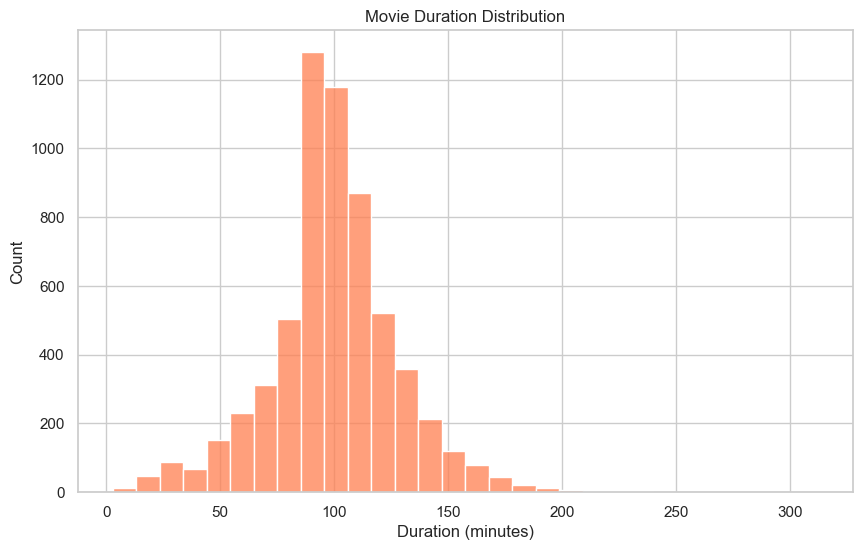

In [23]:
# Filter movies
movies_nf = nf[nf['type'] == 'Movie'].copy()

# Clean duration column
movies_nf['duration'] = movies_nf['duration'].str.replace(' min', '')
movies_nf['duration'] = pd.to_numeric(movies_nf['duration'], errors='coerce')

plt.figure(figsize=(10,6))
sns.histplot(movies_nf['duration'], bins=30, color='coral')
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()


C:\Users\Uday show\AppData\Local\Temp\ipykernel_16660\596057675.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=nf, y='rating', order=nf['rating'].value_counts().index, palette='pastel')


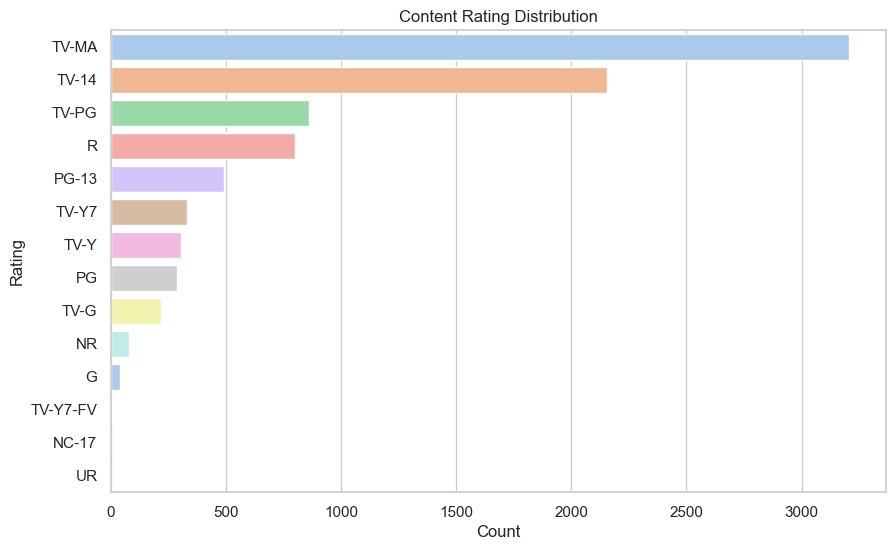

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=nf, y='rating', order=nf['rating'].value_counts().index, palette='pastel')
plt.title('Content Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


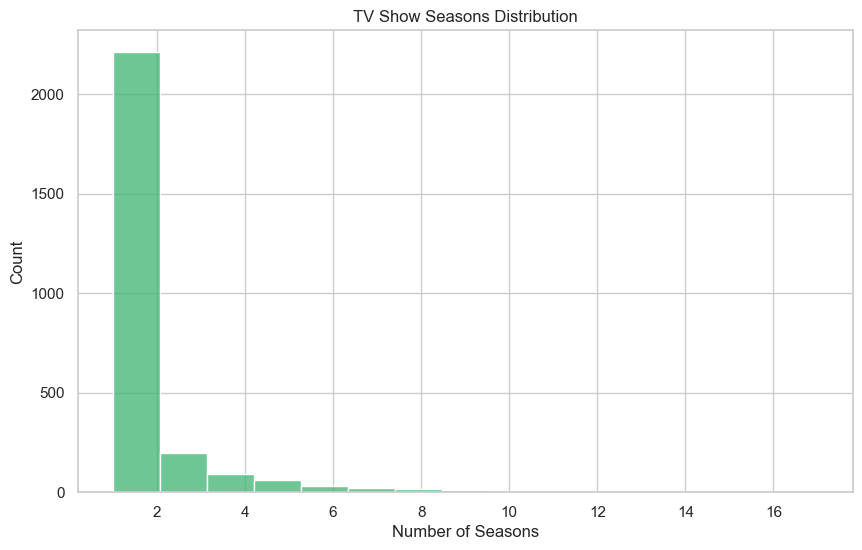

In [27]:
tv_shows_nf = nf[nf['type'] == 'TV Show'].copy()


tv_shows_nf['seasons'] = tv_shows_nf['duration'].str.replace(' Season', '').str.replace('s', '')
tv_shows_nf['seasons'] = pd.to_numeric(tv_shows_nf['seasons'], errors='coerce')

plt.figure(figsize=(10,6))
sns.histplot(tv_shows_nf['seasons'], bins=15, color='mediumseagreen')
plt.title("TV Show Seasons Distribution")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()
